In [1]:
from auto_measure_varying_detuning import *

In [2]:
try:
    ctx = Context('pva')
    osc = iapp.Osc_RS()
    func_gen = iapp.Func_Gen()
except Exception as e:
    # Handle any exception here
    print(f"An error occurred:\n {e}")
    ctx = None
    osc = None
    func_gen = None

In [32]:
B=11 # Set current for magnetic field
window = MeasureWindow(ctx=ctx, osc=osc, func_gen=func_gen, Current=B)

In [63]:
time.sleep(1)
window.go_to_freq(1044)
time.sleep(1)
window.FluoCurve_auto_meas(1027)
time.sleep(5)
window.save_data_osc(Det=1044)

Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0


In [33]:
D_res = 1027 # resonance frequency 
Detuning_list = range(1034, 1050, 2)
for D_L in Detuning_list:
  time.sleep(1)
  window.go_to_freq(D_L)
  time.sleep(1)
  window.FluoCurve_auto_meas(D_res)
  time.sleep(5)
  window.save_data_osc(Det=D_L)

Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0


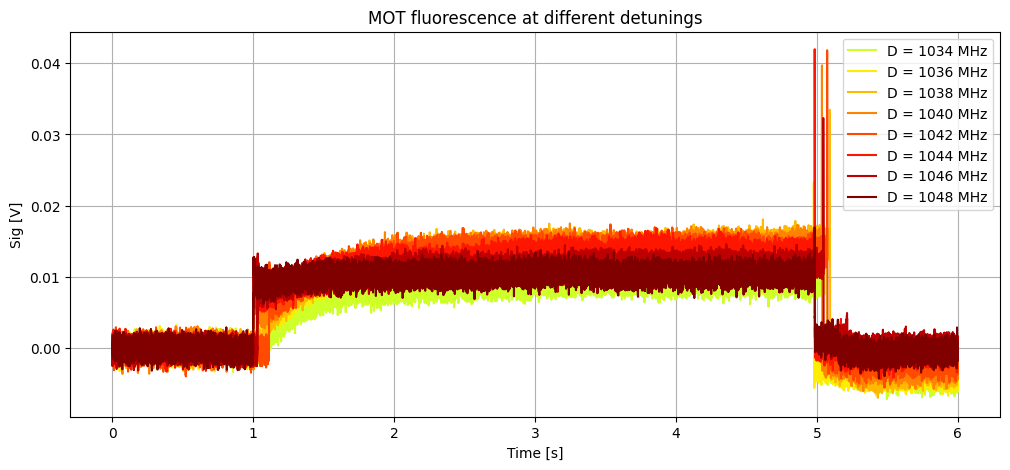

In [34]:
from pathlib import Path
import matplotlib.pyplot as plt

directory = Path('.')

color_palette = plt.cm.jet(np.linspace(0.6, 1, len(Detuning_list)))

_, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.set_title(f'MOT fluorescence at different detunings')

for i, D in enumerate(Detuning_list):
  file_list = list(directory.glob(f"B={B}_D={D}.csv"))
  df = pd.read_csv(file_list[0], header=1, names=['Time [s]', 'Sig [V]'])
  
  x_data = df['Time [s]'].to_numpy()
  x_data = x_data - np.min(x_data)
  index_offset = (x_data > 0.2) * (x_data < 0.5)
  y_data = df['Sig [V]'].to_numpy()
  offset = np.mean(y_data[index_offset])
  
  y_data = y_data - offset
  dy_data = np.std(y_data[index_offset])
  
  N = len(x_data)
  ax.plot(x_data, y_data, label=f'D = {D} MHz', color=color_palette[i])
  ax.set_xlabel('Time [s]')
  ax.set_ylabel('Sig [V]')
  ax.legend()

#plt.legend(prop=base_font)
plt.grid()
plt.show()